In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
import math

# !pip install ta
import ta
# from mpl_finance import candlestick2_ohlc

# from tqdm import tqdm
from tqdm.contrib.telegram import tqdm, trange
from scipy import optimize
import winsound

# # for using GPU
# from numba import jit, cuda

# to measure exec time
from timeit import default_timer as timer

import json

In [2]:
# save as json

# import json
# import datetime as dt

def save_as_json(inp_dict, output_folder, indent = 4, output_filename_prefix = 'output'):
    now = dt.datetime.now()
    ret = [now.month, now.day, now.hour, now.minute]
    ret = ['0' + str(i) if len(str(i)) == 1 else i for i in ret]
    now_str = "{}{}{}-{}{}-{}".format(now.year, ret[0], ret[1], ret[2], ret[3], now.second)
    output_filename = f'{output_filename_prefix}_{now_str}.json'
    output_path = f'{output_folder}\\{output_filename}'
    
    out_file = open(output_path, "w")
    json.dump(inp_dict, out_file, indent = indent)
    out_file.close()

In [3]:
# import datetime as dt
# import pandas as pd

def save_as_csv(input_df, output_folder, output_filename_prefix = 'output'):
#     output_folder = r'C:\Users\priva\OneDrive - HKUST Connect\Stock\Data\temp outputs'
    now = dt.datetime.now()
    ret = [now.month, now.day, now.hour, now.minute]
    ret = ['0' + str(i) if len(str(i)) == 1 else i for i in ret]
    now_str = "{}{}{}-{}{}-{}".format(now.year, ret[0], ret[1], ret[2], ret[3], now.second)
    output_filename = f'{output_filename_prefix}_{now_str}.csv'
    
    output_link = f'{output_folder}\\{output_filename}'
    input_df.to_csv(output_link)
    print(f"Output file is saved to \n{output_folder}\nFilename: {output_filename}")
    return output_link

In [4]:
def send_to_telegram(message, token, chat_id):
    import requests
    apiURL = f'https://api.telegram.org/bot{token}/sendMessage'

    try:
        response = requests.post(apiURL, json={'chat_id': chat_id, 'text': message})
        print(response.text)
    except Exception as e:
        print(e)

# Get Stock Data

In [5]:
# # Download from Yahoo Finance
# ticker = "0388.HK"
# start_date = int(dt.datetime(2005,1,1).timestamp())
# end_date = int(dt.datetime(2015,1,1).timestamp())
# interval = "1d"

# df = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval={}&events=history&includeAdjustedClose=true".
#                        format(ticker, start_date, end_date, interval))
# df

In [6]:
df = pd.read_csv(r'C:\Users\Planet Edu\OneDrive\Tutor 導師\George\temp\asset\^GSPC_1d_19280103_20221027.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0
...,...,...,...,...,...,...,...
23815,2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,3752.750000,5078020000
23816,2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,3797.340088,4747930000
23817,2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,3859.110107,4843120000
23818,2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,3830.600098,4817310000


# Data Preprocessing

In [7]:
df = df.dropna()

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0
...,...,...,...,...,...,...,...
23815,2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,3752.750000,5078020000
23816,2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,3797.340088,4747930000
23817,2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,3859.110107,4843120000
23818,2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,3830.600098,4817310000


In [9]:
# replace Adj Close with Close
# drop the Adj Close column
df['Close'] = df['Adj Close']
df = df.drop(columns = ['Adj Close'])
df

,Date,Open,High,Low,Close,Volume
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,0
...,...,...,...,...,...,...
23815,2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,5078020000
23816,2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,4747930000
23817,2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,4843120000
23818,2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,4817310000


In [10]:
df['Close_ln'] = np.log(df['Close'])
df

,Date,Open,High,Low,Close,Volume,Close_ln
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,0,2.876949
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,0,2.874694
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,0,2.865054
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,0,2.871302
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,0,2.862201
...,...,...,...,...,...,...,...
23815,2022-10-21,3657.100098,3757.889893,3647.419922,3752.750000,5078020000,8.230244
23816,2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,4747930000,8.242056
23817,2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,4843120000,8.258192
23818,2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,4817310000,8.250777


# Backtesting for Training and Testing

In [70]:
# Version 3

# @jit(target_backend='cuda') 
def backtest(df, long_rules, short_rules, long_only = True, \
             initial_capital=100000, commission_percent=0.5, risk_free_rate = 5, \
             buy_next_day=True, date='Date', buy_at = 'Close',\
             signals='Signals', shares='Shares', cash='Cash', stock='Stock', equity='Equity', 
             action_completed = "Action Completed"):
    
    df = df.copy()
    df.reset_index(drop=False, inplace=True)
    
    # Assume no short selling allowed
    # ie sell holing stocks whenever a short signal is triggered
    
    # Check for any conflicts between long_rules and short_rules
    for i in range(len(long_rules)):
        # Cannot long/short at the same time
        if abs(long_rules[i])>0 and abs(short_rules[i])>0:
            return 'Signal problem(s) found at index {}'.format(i)
    
    # Init
    action_delay = 1 if buy_next_day else 0
    
    df[signals] = [long_rules[i]+short_rules[i] for i in range(len(long_rules))]  
    df.loc[0,cash] = initial_capital
    df.loc[0,stock] = 0
    df.loc[0,shares] = 0
    df.loc[0,action_completed] = 0
    
    def buy_shares(cash, price, commission_percent):
        shares = cash//price
        if price == 0:
            return None
        while shares*price*(1+commission_percent/100)>cash and shares > 0:
            shares -= 1
        return shares
    
    txn_list = []
    # Iterate through the df
    for r in range(1, len(df)):

        # here 2022-11-12 
        # debug for conflicts between the proposed action and new signal; yet selling (exit long) overrides
        proposed_action = df.loc[r-action_delay, signals]
        new_signal = df.loc[r, signals]
        
        # Long triggered
        if proposed_action > 0 :
#         if proposed_action > 0 and not(new_signal < 0) :
            if df.loc[r-1, shares] == 0:
                df.loc[r,shares] = buy_shares(cash = df.loc[r-1,cash],\
                                             price = df.loc[r,buy_at],\
                                             commission_percent = commission_percent)
                if df.loc[r,shares] == None:
                    print('Error: at ' + str(r))
                
                df.loc[r,stock] = df.loc[r,shares]*df.loc[r,buy_at]
                df.loc[r,cash] = df.loc[r-1,cash] - df.loc[r,stock]
                
                # update txn_list only if a purchase is really completed
                if df.loc[r,shares] > 0:
                    txn_list.append([r, 1] + list(df.loc[r, [date, shares, stock, cash]]))
                    df.loc[r,action_completed] = 1
                else:
                    df.loc[r,action_completed] = 0
            else:
                # Hold/No Action
                df.loc[r,shares] = df.loc[r-1, shares]
                df.loc[r,cash] = df.loc[r-1,cash]
                df.loc[r,stock] = df.loc[r-1,stock]
                df.loc[r,action_completed] = 0
            
        # Short triggered/ Selling triggered for Long-Only Appraoch
        # Selling (exit long) overrides
        elif proposed_action < 0:
            df.loc[r,shares] = 0
            df.loc[r,stock] = 0
            df.loc[r,cash] = df.loc[r-1,cash] + df.loc[r-1,shares]*df.loc[r,buy_at]*(1-commission_percent/100)
            # update txn_list only if a sale is really completed (ie previously holding the stock)
            if df.loc[r-1,shares] > 0:
                txn_list.append([r, -1] + list(df.loc[r, [date, shares, stock, cash]]))
            
            df.loc[r,action_completed] = 0 if df.loc[r,shares] == df.loc[r-1,shares] else -1

        # Hold/No Action
        else:
            df.loc[r,shares] = df.loc[r-1,shares]
            df.loc[r,stock] = df.loc[r,shares]*df.loc[r,buy_at]
            df.loc[r,cash] = df.loc[r-1,cash]
            df.loc[r,action_completed] = 0
            
    df[equity] = df[cash] + df[stock] 
    
    return df
       
#     # -----------------------------------------------------------------------------------------------------
#     # analyze the transactions
#     def get_pct_change(x_prev, x_new, scale = 100):
#         if x_prev == 0.:
#             ret_sgn = np.sign([x_prev, x_new]).prod()
#             return -math.inf if ret_sgn < 0 else math.inf
#         else: 
#             return scale*(x_new/x_prev-1)
    
#     # consider each PAIR of buying and selling

#     txn_df = pd.DataFrame(txn_list, columns = ['idx', 'action', 'date', 'shares', 'stock', 'cash'])
    
#     # buy-and-hold return % 
#     # corrected on 2022-11-10 1639
#     bnh_pct = None
#     if len(txn_df) >= 1:
#         bnh_cash = txn_df.loc[0, 'cash']
#         bnh_shares = txn_df.loc[0, 'shares']
#         bnh_stock = txn_df.loc[0, 'stock']
#         bnh_last_price = df.loc[len(df)-1, buy_at]
        
#         bnh_pct = get_pct_change(x_prev = bnh_cash + bnh_stock, 
#                                  x_new = bnh_cash + bnh_shares * bnh_last_price, 
#                                  scale = 100)
#         print(f'here 2022-11-12 testing; {bnh_pct}')
        
#     if len(txn_df) >=2:
#         txn_df['equity'] = txn_df['cash'] + txn_df['stock']

#         # return of each pair of transaction
#         i = 0
#         txn_df['return_txnpair'] = np.nan
#         txn_df['return_pct_txnpair'] = np.nan
#         while i <= len(txn_list)-2:  
#             txn_df.loc[i, 'return_txnpair'] = txn_df.loc[i+1, 'equity'] - txn_df.loc[i, 'equity']
#             txn_df.loc[i, 'return_pct_txnpair'] = get_pct_change(x_prev = txn_df.loc[i, 'equity'], 
#                                                                  x_new = txn_df.loc[i+1, 'equity'], 
#                                                                  scale = 100)
#             i+=2
        
#         # net profit %
#         profit_net_pct = get_pct_change(x_prev = df.loc[df.index[0],equity], 
#                                         x_new = df.loc[df.index[-1],equity], 
#                                         scale = 100)
        
# #         print(f'profit_net_pct: {profit_net_pct}')
        
#         # gross profit, gross loss, and their %
#         profit_gross = txn_df[txn_df['return_txnpair'] > 0]['return_txnpair'].sum()
#         profit_gross_pct = get_pct_change(x_prev = initial_capital, 
#                                           x_new = initial_capital+profit_gross, 
#                                           scale = 100)
# #         print(f'profit_net_pct: {profit_net_pct}')
        
#         loss_gross = txn_df[txn_df['return_txnpair'] <= 0]['return_txnpair'].sum()
#         loss_gross_pct = get_pct_change(x_prev = initial_capital, 
#                                         x_new = initial_capital+loss_gross, 
#                                         scale = 100)
# #         print(f'loss_gross_pct: {loss_gross_pct}')
        
#         # profit factor
#         profit_factor = profit_gross / loss_gross if abs(loss_gross) > 0 else 10**9    # prevent DivisionByZero
        
# #         print(f'profit_factor: {profit_factor}')

#         # max run-up and max draw-down
#         runup_pct_max = txn_df['return_pct_txnpair'].max()
#         drawdown_pct_max = txn_df['return_pct_txnpair'].min()    # using min because the drawdown % is neg
        
# #         print(f'runup_pct_max: {runup_pct_max}')
# #         print(f'drawdown_pct_max: {drawdown_pct_max}')

#         # Sharpe & Sortino; Avg Trade (geo mean) (mean_return_pct_annual)
#         # Also the avg winning trade and avg losing trade
#         dayscount_backtest = len(df)    # neglect days without prices, eg public holidays
# #         print(f'dayscount_backtest: {dayscount_backtest}')

#         mean_return_pct_annual = txn_df['return_pct_txnpair'].dropna().apply(lambda x: x/100 + 1)
#         mean_return_pct_annual = np.power(mean_return_pct_annual.product(), 250/dayscount_backtest)-1    # assume 250 trading days annually
# #         print(f'mean_return_pct_annual: {mean_return_pct_annual}')
        
#         sd_return_pct_annual = txn_df['return_pct_txnpair'].std(ddof = 0)
        
#         sd_return_pct_annual *= np.sqrt(dayscount_backtest)    # assume daily data input, and so annualized by multiplying sqrt(days coount)
# #         print(f'sd_return_pct_annual: {sd_return_pct_annual}')
        
#         sd_downside_return_pct_annual = txn_df[txn_df['return_pct_txnpair'] <= 0]['return_pct_txnpair'].std(ddof = 0)
#         sd_downside_return_pct_annual *= np.sqrt(dayscount_backtest)    # assume daily data input, and so annualized by multiplying sqrt(days coount)
# #         print(f'sd_downside_return_pct_annual: {sd_downside_return_pct_annual}')
        
#         sharpe_annual = None if math.isnan(sd_return_pct_annual) or sd_return_pct_annual == 0. else \
#         (mean_return_pct_annual - risk_free_rate)/sd_return_pct_annual
        
#         sortino_annual = None if math.isnan(sd_downside_return_pct_annual) or sd_downside_return_pct_annual == 0. else \
#         (mean_return_pct_annual - risk_free_rate)/sd_downside_return_pct_annual

#         # Avg winning trade
#         # here debug 2022-11-04 WIP
#         avg_loss_pct_annual = None
#         avg_win_pct_annual = None
#         avg_wintoloss_ratio_annual = None
        
# #         if math.isnan(mean_return_pct_annual[mean_return_pct_annual > 0].prod()):
# #             avg_win_pct_annual = None
# #         else:
# #             avg_win_pct_annual = np.power(mean_return_pct_annual[mean_return_pct_annual > 0].prod(), 250/dayscount_backtest)-1
        
# #         # Avg losing trade
# #         if math.isnan(mean_return_pct_annual[mean_return_pct_annual <= 0]):
# #             avg_loss_pct_annual = None
# #         else:
# #             avg_loss_pct_annual = np.power(mean_return_pct_annual[mean_return_pct_annual <= 0].prod(), 250/dayscount_backtest)-1
            
# #         # Avg Win-to-Loss Ratio
# #         if avg_loss_pct_annual == None or avg_win_pct_annual == None:
# #             avg_wintoloss_ratio_annual = None
# #         elif avg_loss_pct_annual == 0:
# #             avg_wintoloss_ratio_annual = math.inf
# #         else:
# #             avg_wintoloss_ratio_annual = avg_win_pct_annual/avg_loss_pct_annual

#         # Max Contracts Held (max_shares)
#         max_shares = txn_df['shares'].max()

#         # Number Winning Trades and Losing Trades and win rate (win_pct)
#         txn_pairs = txn_df['return_pct_txnpair'].dropna()
#         win_count = len(txn_pairs[txn_pairs>0])
#         loss_count = len(txn_pairs[txn_pairs<=0])
#         win_pct = 100*win_count/len(txn_pairs)  
        
# #         print(f'win_count, loss_count, win_pct: {win_count}, {loss_count}, {win_pct}')

#         txn_summary = {'bnh_pct': bnh_pct, 
#                        'profit_net_pct': profit_net_pct, 
#                        'profit_gross_pct': profit_gross_pct, 
#                        'loss_gross_pct': loss_gross_pct, 
#                        'profit_factor': profit_factor, 
#                        'runup_pct_max': runup_pct_max, 
#                        'drawdown_pct_max': drawdown_pct_max, 
#                        'mean_return_pct_annual': mean_return_pct_annual, 
#                        'sd_return_pct_annual': sd_return_pct_annual, 
#                        'sd_downside_return_pct_annual': sd_downside_return_pct_annual, 
#                        'risk_free_rate': risk_free_rate,
#                        'sharpe_annual': sharpe_annual, 
#                        'sortino_annual': sortino_annual, 
#                        'avg_win_pct_annual': avg_win_pct_annual, 
#                        'avg_loss_pct_annual': avg_loss_pct_annual, 
#                        'avg_wintoloss_ratio_annual': avg_wintoloss_ratio_annual, 
#                        'max_shares': max_shares, 
#                        'win_count': win_count, 
#                        'loss_count':loss_count,
#                        'win_pct': win_pct, 
#                        'txn_list': txn_list}
#     else:
#         txn_summary = {'bnh_pct': bnh_pct, 
#                        'profit_net_pct': None, 
#                        'profit_gross_pct': None, 
#                        'loss_gross_pct': None, 
#                        'profit_factor': None, 
#                        'runup_pct_max': None, 
#                        'drawdown_pct_max': None, 
#                        'mean_return_pct_annual': None, 
#                        'sd_return_pct_annual': None, 
#                        'sd_downside_return_pct_annual': None, 
#                        'risk_free_rate': risk_free_rate,
#                        'sharpe_annual': None, 
#                        'sortino_annual': None, 
#                        'avg_win_pct_annual': 0, 
#                        'avg_loss_pct_annual': None, 
#                        'avg_wintoloss_ratio_annual': None, 
#                        'max_shares': 0, 
#                        'win_count': 0, 
#                        'loss_count':0,
#                        'win_pct': 0, 
#                        'txn_list': txn_list}
    

    
# #     # testing, wait for debug
# #     # debug here 2022-10-31 0204
    
# #     txn_df = pd.DataFrame()
# #     txn_summary = dict()
    
#     return (df, txn_df, txn_summary)
    

In [98]:
# debug here 2022-11-13 1017 (WIP)
# for debugging and testing
long_rules = df_temp['actions'].apply(lambda x: 1 if x == 1 else 0).to_list()
short_rules = df_temp['actions'].apply(lambda x: -1 if x == -1 else 0).to_list()
ret = backtest(df_temp, long_rules = long_rules, short_rules = short_rules)

In [99]:
ret.tail()

,index,Date,Close,Close_ln,"KAMA(Close_ln, 10, 4, 10)","KAMA-Mean(Close_ln, 10, 4, 10, 23)","delta(KAMA(Close_ln, 10, 4, 10), 2)",long_actions,short_actions,actions,Signals,Cash,Stock,Shares,Action Completed,Equity
119,23572,2021-11-03,4660.569824,8.446893,8.423539,8.431842,0.002891,None,NaN,0,0,100000.0,0.0,0.0,0.0,100000.0
120,23573,2021-11-04,4680.060059,8.451066,8.426608,8.437078,0.003069,None,NaN,0,0,100000.0,0.0,0.0,0.0,100000.0
121,23574,2021-11-05,4697.529785,8.454792,8.430037,8.442208,0.003429,None,NaN,0,0,100000.0,0.0,0.0,0.0,100000.0
122,23575,2021-11-08,4701.700195,8.455679,8.433067,8.446652,0.003031,None,NaN,0,0,100000.0,0.0,0.0,0.0,100000.0
123,23576,2021-11-09,4685.250000,8.452175,8.434889,8.449293,0.001822,None,NaN,0,0,100000.0,0.0,0.0,0.0,100000.0


In [104]:
8.434889/8.433067-1

0.0002160542540454724

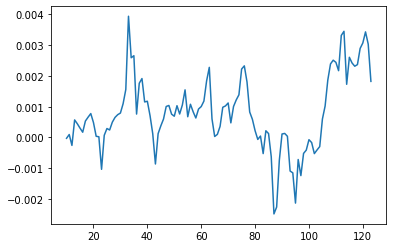

In [96]:
plt.plot(ret['delta(KAMA(Close_ln, 10, 4, 10), 2)'])

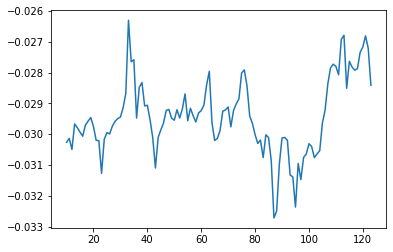

In [97]:
plt.plot(ret['delta(KAMA(Close_ln, 10, 4, 10), 2)'].apply(lambda x: x-param_test[3]))

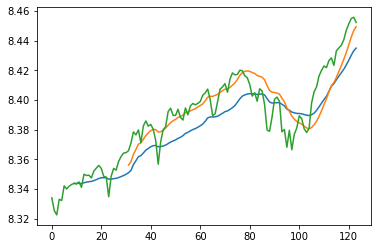

In [105]:
plt.plot(ret[['KAMA(Close_ln, 10, 4, 10)',
              'KAMA-Mean(Close_ln, 10, 4, 10, 23)','Close_ln']])

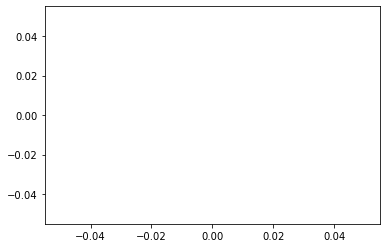

In [86]:
plt.plot(ret['long_actions'])

In [14]:
# # Version 2

# # @jit(target_backend='cuda') 
# def backtest(df, long_rules, short_rules, long_only = True, \
#              initial_capital=100000, commission_percent=0.5, risk_free_rate = 5, \
#              buy_next_day=True, date='Date', buy_at = 'Close',\
#              signals='Signals', shares='Shares', cash='Cash', stock='Stock', equity='Equity'):
    
#     df = df.copy()
#     df.reset_index(drop=False, inplace=True)
    
#     # Assume no short selling allowed
#     # ie sell holing stocks whenever a short signal is triggered
    
#     # Check for any conflicts between long_rules and short_rules
#     for i in range(len(long_rules)):
#         # Cannot long/short at the same time
#         if abs(long_rules[i])>0 and abs(short_rules[i])>0:
#             return 'Signal problem(s) found at index {}'.format(i)
    
#     # Init
#     action_delay = 1 if buy_next_day else 0
    
#     df[signals] = [long_rules[i]+short_rules[i] for i in range(len(long_rules))]
#     df.loc[0,cash] = initial_capital
#     df.loc[0,stock] = 0
#     df.loc[0,shares] = 0
    
#     def buy_shares(cash, price, commission_percent):
#         shares = cash//price
#         if price == 0:
#             return None
#         while shares*price*(1+commission_percent/100)>cash and shares > 0:
#             shares -= 1
#         return shares
    
#     txn_list = []
#     # Iterate through the df
#     for r in range(1, len(df)):

#         # Long triggered
#         if df.loc[r-action_delay, signals] > 0:
#             if df.loc[r-1, shares] == 0:
#                 df.loc[r,shares] = buy_shares(cash = df.loc[r-1,cash],\
#                                              price = df.loc[r,buy_at],\
#                                              commission_percent = commission_percent)
#                 if df.loc[r,shares] == None:
#                     print('Error: at ' + str(r))
                
#                 df.loc[r,stock] = df.loc[r,shares]*df.loc[r,buy_at]
#                 df.loc[r,cash] = df.loc[r-1,cash] - df.loc[r,stock]
#                 txn_list.append([r] + list(df.loc[r, [date, shares, stock, cash]]))
#             else:
#                 df.loc[r,shares] = df.loc[r-1, shares]
#                 df.loc[r,cash] = df.loc[r-1,cash]
#                 df.loc[r,stock] = df.loc[r-1,stock]
            
#         # Short triggered/ Selling triggered for Long-Only Appraoch
#         elif df.loc[r-action_delay, signals] < 0:
#             df.loc[r,shares] = 0
#             df.loc[r,stock] = 0
#             df.loc[r,cash] = df.loc[r-1,cash] + df.loc[r-1,shares]*df.loc[r,buy_at]*(1-commission_percent/100)
#             txn_list.append([r] + list(df.loc[r, [date, shares, stock, cash]]))

#         # Hold/No Action
#         else:
#             df.loc[r,shares] = df.loc[r-1,shares]
#             df.loc[r,stock] = df.loc[r,shares]*df.loc[r,buy_at]
#             df.loc[r,cash] = df.loc[r-1,cash]
            
#     df[equity] = df[cash] + df[stock] 
    
#     # -----------------------------------------------------------------------------------------------------
#     # analyze the transactions
#     def get_pct_change(x_prev, x_new, scale = 100):
#         return scale*(x_new/x_prev-1)
    
#     # consider each PAIR of buying and selling
#     # buy-and-hold return % 
#     bnh_pct = get_pct_change(x_prev = df.loc[df.index[0],equity], 
#                              x_new = df.loc[df.index[-1],equity], 
#                              scale = 100) 
#     txn_df = pd.DataFrame(txn_list, columns = ['idx', 'date', 'shares', 'stock', 'cash'])
#     if len(txn_df) >=2:
#         txn_df['equity'] = txn_df['cash'] + txn_df['stock']

#         # return of each pair of transaction
#         i = 0
#         txn_df['return_txnpair'] = np.nan
#         txn_df['return_pct_txnpair'] = np.nan
#         while i <= len(txn_list)-2:  
#             txn_df.loc[i, 'return_txnpair'] = txn_df.loc[i+1, 'equity'] - txn_df.loc[i, 'equity']
#             txn_df.loc[i, 'return_pct_txnpair'] = get_pct_change(x_prev = txn_df.loc[i, 'equity'], 
#                                                                  x_new = txn_df.loc[i+1, 'equity'], 
#                                                                  scale = 100)
#             i+=2
 
#         # net profit %
#         profit_net_pct = get_pct_change(x_prev = df.loc[df.index[0],buy_at], 
#                                         x_new = df.loc[df.index[-1],buy_at], 
#                                         scale = 100)
#         # gross profit, gross loss, and their %
#         profit_gross = txn_df[txn_df['return_txnpair'] > 0].sum()
#         profit_gross_pct = get_pct_change(x_prev = initial_capital, 
#                                           x_new = initial_capital+profit_gross, 
#                                           scale = 100)
#         loss_gross = txn_df[txn_df['return_txnpair'] <= 0].sum()
#         loss_gross_pct = get_pct_change(x_prev = initial_capital, 
#                                         x_new = initial_capital+loss_gross, 
#                                         scale = 100)
#         # profit factor
#         profit_factor = profit_gross / loss_gross

#         # max run-up and max draw-down
#         runup_pct_max = txn_df['return_pct_txnpair'].max()
#         drawdown_pct_max = txn_df['return_pct_txnpair'].min()    # using min because the drawdown % is neg

#         # Sharpe & Sortino; Avg Trade (geo mean) (mean_return_pct_annual)
#         # Also the avg winning trade and avg losing trade
#         dayscount_backtest = len(df)    # neglect days without prices, eg public holidays

#         mean_return_pct_annual = txn_df['return_pct_txnpair'].dropna().apply(lambda x: x/100 + 1)
#         mean_return_pct_annual = np.power(mean_return_pct_annual.product(), 250/dayscount_backtest)-1    # assume 250 trading days annually

#         sd_return_pct_annual = txn_df['return_pct_txnpair'].std(ddof = 0)
#         sd_return_pct_annual *= np.sqrt(dayscount_backtest)    # assume daily data input, and so annualized by multiplying sqrt(days coount)

#         sd_downside_return_pct_annual = txn_df[txn_df['return_pct_txnpair'] <= 0].std(ddof = 0)
#         sd_downside_return_pct_annual *= np.sqrt(dayscount_backtest)    # assume daily data input, and so annualized by multiplying sqrt(days coount)

#         sharpe_annual = (mean_return_pct_annual - risk_free_rate)/sd_return_pct_annual
#         sortino_annual = (mean_return_pct_annual - risk_free_rate)/sd_downside_return_pct_annual

#         # Avg winning trade, avg losing trade, and their ratio
#         avg_win_pct_annual = np.power(mean_return_pct_annual[mean_return_pct_annual > 0].prod(), 250/dayscount_backtest)-1
#         avg_loss_pct_annual = np.power(mean_return_pct_annual[mean_return_pct_annual <= 0].prod(), 250/dayscount_backtest)-1
#         avg_wintoloss_ratio_annual = avg_win_pct_annual/avg_loss_pct_annual

#         # Max Contracts Held (max_shares)
#         max_shares = txn_df['shares'].max()

#         # Number Winning Trades and win rate (win_pct)
#         txn_pairs = txn_df['return_pct_txnpair'].dropna()
#         win_count = len(txn_pairs[txn_pairs>0])
#         win_pct = 100*win_count/len(txn_pairs)        

#         txn_summary = {'bnh_pct': bnh_pct, 
#                        'profit_net_pct': profit_net_pct, 
#                        'profit_gross_pct': profit_gross_pct, 
#                        'loss_gross_pct': loss_gross_pct, 
#                        'profit_factor': profit_factor, 
#                        'runup_pct_max': runup_pct_max, 
#                        'drawdown_pct_max': drawdown_pct_max, 
#                        'mean_return_pct_annual': mean_return_pct_annual, 
#                        'sd_return_pct_annual': sd_return_pct_annual, 
#                        'sd_downside_return_pct_annual': sd_downside_return_pct_annual, 
#                        'risk_free_rate': risk_free_rate,
#                        'sharpe_annual': sharpe_annual, 
#                        'sortino_annual': sortino_annual, 
#                        'avg_win_pct_annual': avg_win_pct_annual, 
#                        'avg_loss_pct_annual': avg_loss_pct_annual, 
#                        'avg_wintoloss_ratio_annual': avg_wintoloss_ratio_annual, 
#                        'max_shares': max_shares, 
#                        'win_count': win_count, 
#                        'win_pct': win_pct}
#     else:
#         txn_summary = {'bnh_pct': bnh_pct, 
#                        'profit_net_pct': None, 
#                        'profit_gross_pct': None, 
#                        'loss_gross_pct': None, 
#                        'profit_factor': None, 
#                        'runup_pct_max': None, 
#                        'drawdown_pct_max': None, 
#                        'mean_return_pct_annual': None, 
#                        'sd_return_pct_annual': None, 
#                        'sd_downside_return_pct_annual': None, 
#                        'risk_free_rate': risk_free_rate,
#                        'sharpe_annual': None, 
#                        'sortino_annual': None, 
#                        'avg_win_pct_annual': None, 
#                        'avg_loss_pct_annual': None, 
#                        'avg_wintoloss_ratio_annual': None, 
#                        'max_shares': None, 
#                        'win_count': 0, 
#                        'win_pct': None}
    
#     # testing, wait for debug
#     # debug here 2022-10-31 0204
    
# #     txn_df = pd.DataFrame()
# #     txn_summary = dict()
    
#     return (df, txn_df, txn_summary)
    

In [25]:
# @jit(target_backend='cuda')
def add_dc(df, dc_source, dc_len, bound_pct = 0, bound = 'both'):
    df = df.copy()
    
    if bound.lower() == 'upper':
        df['{}-Period High'.format(dc_len)] = df[dc_source].rolling(dc_len).max().apply(lambda x: (1+bound_pct)*x)
    
    elif bound.lower() == 'lower':
        df['{}-Period Low'.format(dc_len)] = df[dc_source].rolling(dc_len).min().apply(lambda x: (1-bound_pct)*x)
    
    elif bound == 'both':
        df['{}-Period High'.format(dc_len)] = df[dc_source].rolling(dc_len).max().apply(lambda x: (1+bound_pct)*x)
        df['{}-Period Low'.format(dc_len)] = df[dc_source].rolling(dc_len).min().apply(lambda x: (1-bound_pct)*x)
    else:
        assert False, '\'bound\' is expected to be either \'upper\', \'lower\', or \'both\'.'
    return df

In [26]:
# here 2022-11-05 0951 WIP
# assert False, 'here 2022-11-05 0951 WIP'
def add_kama(df, src_colname, delta_len = 10, fast_len = 2, slow_len = 30, with_kama_mean = True, kama_mean_len = 25, fillna = False):
    df = df.copy()
    kama = ta.momentum.kama(close=df[src_colname], 
                            window = delta_len, 
                            pow1 = fast_len, 
                            pow2 = slow_len, 
                            fillna = False)
    df[f'KAMA({src_colname}, {delta_len}, {fast_len}, {slow_len})'] = kama
    if with_kama_mean:
        # shifted KAMA by the mean of residual within a rolling window
        rsd = df[src_colname] - kama                          # kama here is the original KAMA
        rsd_mean = rsd.rolling(kama_mean_len).mean()
        kama_mean = kama + rsd_mean                           # shifted KAMA-Mean
        df[f'KAMA-Mean({src_colname}, {delta_len}, {fast_len}, {slow_len}, {kama_mean_len})'] = kama_mean  
    return df

In [27]:
def delta(inp_list):
    # last value - start value
    return inp_list[-1] - inp_list[0]

In [106]:
# Caution: 
# 1. df_temp is to be assigned OUTSIDE the function below
# 2. input of the function below CANNOT be changed, or otherwise optimization cannot be performed.

# @jit(target_backend='cuda')
def objective_func(x):
    global df_temp, df_bt, txn_df, txn_summary
    
    # ==============================================================================================
    # KAMA-Mean
    # here 2022-11-05 0951
    n_delta, n_fast, n_slow, delta_lim_up, delta_lim_dn, delta_lim_len, kama_mean_len = x
    
    src_name = 'Close_ln'
    n_delta = int(round(n_delta,0))    # ensure integer
    n_fast = int(round(n_fast,0))      # ensure integer
    n_slow = int(round(n_slow,0))      # ensure integer
    kama_mean_len = int(round(kama_mean_len, 0))    # ensure integer
    delta_lim_len = int(round(delta_lim_len, 0))    # ensure integer
    
    df_temp = add_kama(df = df_temp, 
                       src_colname = src_name, 
                       delta_len = n_delta, 
                       fast_len = n_fast, 
                       slow_len = n_slow, 
                       with_kama_mean = True, 
                       kama_mean_len = kama_mean_len, 
                       fillna = False)
    
    ub_col = f'KAMA({src_name}, {n_delta}, {n_fast}, {n_slow})'
    lb_col = f'KAMA-Mean({src_name}, {n_delta}, {n_fast}, {n_slow}, {kama_mean_len})'
    kama_delta_col = f'delta({ub_col}, {delta_lim_len})'
    
    kama_delta = df_temp[ub_col].rolling(delta_lim_len).apply(lambda x: delta(list(x)))    # Caution: delta of KAMA, not of KAMA-Mean
    df_temp[kama_delta_col] = kama_delta    # Caution: delta of KAMA, not of KAMA-Mean
    
#     # here 2022-11-11 1156
#     # drop the first extra_len_init rows of data
#     # these rows are just needed for prevention of NaN values in the indicator column(s) (ie KAMA and KAMA-Mean)
#     df_temp.drop(df_temp.index[:extra_len_init], inplace=True)
    
    # buying / selling actions 
    long_actions = df_temp[kama_delta_col] - delta_lim_up
    long_actions = long_actions.apply(lambda x: 1 if x > 0 else None)
    df_temp['long_actions'] = long_actions  

    short_actions = df_temp[src_name] - df_temp[lb_col]
    short_actions = short_actions.apply(lambda x: -1 if x < 0 else None)
    df_temp['short_actions'] = short_actions
    
    # ==============================================================================================
    
#     # ==============================================================================================
#     # DC

#     global n_up_interval, n_dn_interval

#     # init
#     n_up, n_dn, bound_up_pct, bound_dn_pct = x    
#     n_up = int(round(n_up,0))    # ensure integer
#     n_dn = int(round(n_dn,0))    # ensure integer
    
#     n_up *= n_up_interval
#     n_dn *= n_dn_interval
    
#     # ----------------------------------
#     # add DC bounds
#     df_temp = add_dc(df = df_temp, 
#                      dc_source = 'Close', 
#                      dc_len = n_up, 
#                      bound_pct = 0, 
#                      bound = 'upper')
#     df_temp = add_dc(df = df_temp, 
#                      dc_source = 'Close', 
#                      dc_len = n_dn, 
#                      bound_pct = 0, 
#                      bound = 'lower')
#     ub_col = f'{n_up}-Period High'
#     lb_col = f'{n_dn}-Period Low'
    
#     # buying / selling actions 
#     long_actions = (df_temp['Close'] / df_temp[ub_col].shift(1) - 1) - bound_up_pct
#     long_actions = long_actions.apply(lambda x: 1 if x > 0 else None)
#     df_temp['long_actions'] = long_actions  

#     short_actions = (df_temp['Close'] / df_temp[lb_col].shift(1) - 1) - bound_dn_pct
#     short_actions = short_actions.apply(lambda x: -1 if x < 0 else None)
#     df_temp['short_actions'] = short_actions
    
#     # ==============================================================================================
    
    
    # integrate the buying and selling actions (ie a signal)
    # no delay is assumed
    actions = pd.Series(zip(long_actions, short_actions))
    del long_actions, short_actions
    
    actions = actions.apply(lambda x: -1 if x[1] == -1 else 1 if x[0] == 1 else 0)
    df_temp['actions'] = list(actions)    # must turn into a list so as to prevent future errors out of non-matching index
    
    del actions
    
    # debug here 2022-11-03 0004 WIP
    # testing

    # ----------------------------------------------------------------------------------------------
    # backtest
    # input
    initial_capital = 10**5
    long_rules = df_temp['actions'].apply(lambda x: 1 if x == 1 else 0).to_list()
    short_rules = df_temp['actions'].apply(lambda x: -1 if x == -1 else 0).to_list()
    buy_at = 'Close'
    commission_percent = 0.5
    buy_next_day = True

    df_bt, txn_df, txn_summary = backtest(df = df_temp, 
                                          long_rules = long_rules,
                                          short_rules = short_rules,
                                          buy_at = buy_at,
                                          initial_capital = initial_capital, 
                                          commission_percent = commission_percent, 
                                          buy_next_day = buy_next_day)
    
    bt_return_pct = 100*(df_bt.loc[df_bt.index[-1], 'Equity']/initial_capital-1)
    bt_return_pct_signflipped = -bt_return_pct
    win_count = txn_summary['win_count']
    loss_count = txn_summary['loss_count']
    
    # ----------------------------------------------------------------------------------------------
    # objective function
        
#     # version 1
#     bt_ret = bt_return_pct_signflipped
    
#     # version 2
#     bt_ret = bt_return_pct_signflipped + - win_count**2
    
#     # version 3
    bt_ret = - win_count**2 + loss_count**2
    
    # version 4
#     bt_ret = - bt_return_pct - win_count**2 + loss_count**2
    
#     print(f'bt_ret, win_count, bt_return_pct, x\': {bt_ret}, {win_count}, {bt_return_pct}, {[n_up, n_dn, bound_up_pct, bound_dn_pct]}')

    return bt_ret

In [29]:
# test = pd.DataFrame({'Date': df.loc[0:23, 'Date'], 'Close': list(range(12)) + [12 - i for i in range(12)]})
# # test = add_dc( df = test, dc_source = 'Close', dc_len = 5)
# test
# # =====================================================
# df_temp = test.copy()
# n_up_interval, n_dn_interval = 5, 5
# objective_func([1,1,0,0])


In [30]:
# txn_df

In [41]:
# from tqdm import tqdm
# from scipy import optimize
# import datetime as dt
# import winsound

# ----------------------------------------------------------------------------------
# inputs
# inputs for results output and notifications in telegram
output_folder = r"C:\Users\Planet Edu\OneDrive\Tutor 導師\George\temp\temp outputs\2022-11-13 (PlanetEdu DT)"
token = '5651860543:AAEbzdr2mlQUlaU8UELy-vHEnpY-_drKvbw'
chat_id ='-832118262'

# inputs for data separation into training and testing set
rows_toview = 18077                        # define the start of the 1st period for training and testing
period_toview = 250*2 + 125                # 2.5 years
train_pct = 0.8                            # normally taken as 0.7 ~ 0.8

# inputs for optimization
optim_model = 'DA'     # this is just for showing in the returning results
maxiter = 1000
seed = 1

checker = 0    # a checker to ensure only 1 strategy is to be tested

# inputs for the bounds for optimization: 
# =======================================================================================================
# KAMA & KAMA-Mean
# n_delta, n_fast, n_slow, delta_lim_up, delta_lim_dn, delta_lim_len, kama_mean_len
strat_name = 'KAMA with KAMA-Mean'
bounds = [(3, 20), 
          (2, 5), (10, 100), 
          (0, 0.1), (0, 0.1), 
          (2, 5), (5, 100)]

# # here 2022-11-11 1156
# # consider extra prev data to generate values of KAMA-Mean in the beginning days so as to prevent NaN in these days
# # kama_mean_len + delta_lim_len + max(n_slow, n_fast, n_delta)
# extra_len_init = 1 + bounds[6][1] + bounds[5][1] + max(bounds[0][1], bounds[1][1], bounds[2][1])
    
checker += 1
# # =======================================================================================================
# # DC
# # inputs for the bounds for optimization: 
# # n_up (to be multiplied by the interval), n_dn (to be multiplied by 10), bound_up_pct, bound_dn_pct
# strat_name = 'DC'
# bounds = [(1, 20), (1, 20), 
#           (0, 0.1), (0, 0.1)]

# n_up_interval = 5
# n_dn_interval = 5

# checker += 1

# =======================================================================================================

# ----------------------------------------------------------------------------------
assert checker == 1., f"Only 1 stategy can be tested each time, but there are {checker} detected! Check the codes corresponding to the inputs part."
del checker

print(f'''
token: {token}
chat_id: {chat_id}
''')

param_info = f'''
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

strat_name: {strat_name}
dt.datetime.now(): {dt.datetime.now()}

Param.

output_folder: {output_folder}
rows_toview: {rows_toview}
period_toview: {period_toview}
train_pct: {train_pct}
maxiter: {maxiter}
seed: {seed}
bounds: {bounds}
extra_len_init: {extra_len_init}
'''
print(param_info)

# print('\nXXXXXXXXfXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n')
# print(f'strat_name: {strat_name}\n')
# print('Param.\n')
# print(f'output_folder: {output_folder}')
# print(f'rows_toview: {rows_toview}')
# print(f'period_toview: {period_toview}')
# print(f'train_pct: {train_pct}')
# print(f'maxiter: {maxiter}')
# print(f'bounds: {bounds}')



# ----------------------------------------------------------------------------------
# init.

period_test = int(round((1-train_pct)*period_toview,0))

# get intervals for traing and testing
print('\nXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n')
print('\nIntervals of Periods: \n')

periods = [((rows_toview+period_test*i, df.loc[rows_toview+period_test*i, 'Date']), 
            (rows_toview+period_test*i+period_toview-1, df.loc[rows_toview+period_test*i+period_toview-1, 'Date'])) for i in range(40)]
# # Superseded
# # Originally, in the trial, overall periods for training and testing are defined as below:
# periods = [((rows_toview+period_toview*i, df.loc[rows_toview+period_toview*i, 'Date']), 
#             (rows_toview+period_toview*(i+1)-1, df.loc[rows_toview+period_toview*(i+1)-1, 'Date'])) for i in range(9)]


for p in range(len(periods)):
    print((p, periods[p]))


token: 5651860543:AAEbzdr2mlQUlaU8UELy-vHEnpY-_drKvbw
chat_id: -832118262


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

strat_name: KAMA with KAMA-Mean
dt.datetime.now(): 2022-11-13 10:02:56.452785

Param.

output_folder: C:\Users\Planet Edu\OneDrive\Tutor 導師\George\temp\temp outputs\2022-11-13 (PlanetEdu DT)
rows_toview: 18077
period_toview: 625
train_pct: 0.8
maxiter: 1000
seed: 1
bounds: [(3, 20), (2, 5), (10, 100), (0, 0.1), (0, 0.1), (2, 5), (5, 100)]
extra_len_init: 206


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


Intervals of Periods: 

(0, ((18077, '2000-01-03'), (18701, '2002-07-01')))
(1, ((18202, '2000-06-30'), (18826, '2002-12-27')))
(2, ((18327, '2000-12-28'), (18951, '2003-06-27')))
(3, ((18452, '2001-06-28'), (19076, '2003-12-24')))
(4, ((18577, '2002-01-02'), (19201, '2004-06-25')))
(5, ((18702, '2002-07-02'), (19326, '2004-12-22')))
(6, ((18827, '2002-12-30'), (19451, '2005-06-22')))
(7, ((18952, '2003-06-30'

In [42]:
# send the param_info in telegram
send_to_telegram(message = param_info, 
                 token=token, 
                 chat_id=chat_id)

{"ok":true,"result":{"message_id":365,"from":{"id":5651860543,"is_bot":true,"first_name":"tqdm","username":"tqdmtestbot"},"chat":{"id":-832118262,"title":"TQDM Progress - 1","type":"group","all_members_are_administrators":true},"date":1668305062,"text":"XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n\nstrat_name: KAMA with KAMA-Mean\ndt.datetime.now(): 2022-11-13 10:02:56.452785\n\nParam.\n\noutput_folder: C:\\Users\\Planet Edu\\OneDrive\\Tutor \u5c0e\u5e2b\\George\\temp\\temp outputs\\2022-11-13 (PlanetEdu DT)\nrows_toview: 18077\nperiod_toview: 625\ntrain_pct: 0.8\nmaxiter: 1000\nseed: 1\nbounds: [(3, 20), (2, 5), (10, 100), (0, 0.1), (0, 0.1), (2, 5), (5, 100)]\nextra_len_init: 206","entities":[{"offset":105,"length":15,"type":"url"}]}}


##### Get % return for each testing and training period if
##### <<  just buy on 1st day and sell on the last day of the period >>
(only need to run once and save the results for future use if
periods for training and testing are unchanged)

In [41]:
# # here 2022-11-10 1358
# # get ret_pct for each testing period if 
# # just buy on 1st day and sell on the last day of the period

# ret_list = []

# for p in range(0,len(periods)):             # doing in order 
               
#     # get rows for training and testing
#     rows_train = periods[p][0][0], periods[p][0][0] + int(period_toview*train_pct)      
#     rows_test = rows_train[-1] + 1, periods[p][1][0]
    
#     df_summary = df.loc[rows_train[0]: rows_test[1], ['Date', 'Close', 'Close_ln']].copy()
    
#     # for the training period
#     df_train = df_summary.loc[rows_train[0]:rows_train[1],]
#     date_from = df_train.loc[rows_train[0],'Date']
#     date_to = df_train.loc[rows_train[1],'Date']
#     ret_pct = 100 * (df_train.loc[rows_train[1], 'Close'] / df_train.loc[rows_train[0], 'Close'] - 1)     # scaled to 100
    
#     ret_list.append(['Training', date_from, date_to, ret_pct])
    
#     # for the testing period
#     df_test = df_summary.loc[rows_test[0]:rows_test[1],]
#     date_from = df_test.loc[rows_test[0],'Date']
#     date_to = df_test.loc[rows_test[1],'Date']
#     ret_pct = 100 * (df_test.loc[rows_test[1], 'Close'] / df_test.loc[rows_test[0], 'Close'] - 1)     # scaled to 100
    
#     ret_list.append(['Testing', date_from, date_to, ret_pct])
    
# # ret_list


# # -----------------------------------------------------------
# # input

# input_df = pd.DataFrame(ret_list, columns=['Type', 'From', 'To', 'ret_pct_wpbnh'])
# output_folder = r'C:\Users\priva\OneDrive - HKUST Connect\Stock\Data\temp outputs'
# output_filename_prefix = 'Whole Period BnH Pct Return'

# # -----------------------------------------------------------

# save_as_csv(input_df = input_df, output_folder = output_folder, output_filename_prefix = output_filename_prefix)

In [21]:
# # Example codes from the internet
# # about the use of GPU

# from numba import jit, cuda
# import numpy as np
   

# # function optimized to run on gpu 
# @jit(target_backend='cuda')                         
# def func2(a):
#     for i in range(10000000):
#         a[i]+= 1
# if __name__=="__main__":
#     n = 10000000                            
#     a = np.ones(n, dtype = np.float64)
      
#     start = timer()
#     func(a)
#     print("without GPU:", timer()-start)    
      
#     start = timer()
#     func2(a)
#     print("with GPU:", timer()-start)

##### Get % return for each testing and training period if
##### << the given strategy is used >>

In [43]:
# debug here 2022-10-31
# init
results = dict()

# loop through different intervals for training and testing

for p in tqdm(range(len(periods)-1, 0-1, -1), token=token, chat_id=chat_id):    # doing in reversed order
# for p in tqdm(range(0,len(periods)), token=token, chat_id=chat_id):             # doing in order
    
    # send a telegram message
    send_to_telegram(message = f'Overall Period: {periods[p]} now ({dt.datetime.now()})', token=token, chat_id=chat_id)
    
    # get rows for training and testing
    rows_train = periods[p][0][0], periods[p][0][0] + int(period_toview*train_pct)
    rows_test = rows_train[-1] + 1, periods[p][1][0]

    print('\nXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
    print(p)
    print(f'Overall Period: {periods[p]}')
    print('\n~~~ Training : from {} to {}~~~\n'.format(df.loc[rows_train[0], 'Date'], df.loc[rows_train[1], 'Date']))
    
#     # separate into df_train and df_test
#     # here 2022-11-11 1156
#     # consider extra prev data to generate values of KAMA-Mean in the beginning days so as to prevent NaN in these days
    
#     assert rows_train[0] - extra_len_init >= df.index[0], \
#     'Insufficient prior time series data for extra_len_init. {} more is needed.'.format(df.index[0] - rows_train[0] + extra_len_init)
    
#     df_summary = df.loc[rows_train[0]: rows_test[1], ['Date', 'Close', 'Close_ln']].copy()
#     df_train = df_summary.loc[rows_train[0]-extra_len_init : rows_train[1], ]
#     df_test = df_summary.loc[rows_test[0]-extra_len_init : rows_test[1], ]
    
    
    df_summary = df.loc[rows_train[0]: rows_test[1], ['Date', 'Close', 'Close_ln']].copy()
    df_train = df_summary.loc[rows_train[0]:rows_train[1],]
    df_test = df_summary.loc[rows_test[0]:rows_test[1],]

    # ----------------------------------------------------------------------------------
    # Training set
    # optimizate param using the df_train
    start_time = dt.datetime.now()
    
    df_temp = df_train.copy(); optim_results = optimize.dual_annealing(objective_func, bounds = bounds, maxiter = maxiter, seed = seed)
    end_time = dt.datetime.now()
    runtime = end_time - start_time
    optim_results['x'] = list(optim_results['x'])    # for saving in json format
    print('Obj Func Ret: {}'.format(optim_results['fun']))

    # save results to a variable
    date_from = df_train.loc[rows_train[0], 'Date']
    date_to = df_train.loc[rows_train[1], 'Date']
    data_type = 'Training'
    result_entryname_train = '{}_{}_{}_{}'.format(optim_model,data_type, date_from, date_to)
    
#     results[result_entryname_train] = {
#         'Type': data_type, 
#         'From': str(df_train.loc[rows_train[0], 'Date']), 
#         'To': str(df_train.loc[rows_train[1], 'Date']),
#         'Maxiter': maxiter,
#         'Bounds': bounds,
#         'Result': optim_results,
#         'Runtime': str(runtime), 
#         'Runtime Per Iter': str(runtime/maxiter)}

    results[result_entryname_train] = {
        'Strategy': strat_name,
        'Type': data_type, 
        'From': str(df_train.loc[rows_train[0], 'Date']), 
        'To': str(df_train.loc[rows_train[1], 'Date']),
        'Maxiter': maxiter,
        'Bounds': bounds,
        'Result': optim_results,
        'Runtime': str(runtime), 
        'Runtime Per Iter': str(runtime/maxiter),
        'TXN Summary': txn_summary, 
        'TXN log': txn_df.to_dict()}

    print(f'\n{data_type} Completed !\n')
    print('Runtime: {}\n'.format(results[result_entryname_train]['Runtime']))
    
    # save as json
    
    save_as_json(inp_dict = results[result_entryname_train], 
             output_folder = output_folder, 
             indent = 4, 
             output_filename_prefix = '{} Results_{}'.format(strat_name, result_entryname_train))
    
    # ----------------------------------------------------------------------------------
    # Testing set
    # get param for the obj func for the testing set
    result_touse = result_entryname_train
    param_test = results[result_touse]['Result']['x']

    # get result using the param retrieved
    start_time = dt.datetime.now()
    df_temp = df_test.copy()
    obj_func_ret = objective_func(param_test)
    end_time = dt.datetime.now()
    runtime = end_time - start_time
    
    print('Obj Func Ret: {}'.format(obj_func_ret))
    
    # save results to a variable
    date_from = df_test.loc[rows_test[0], 'Date']
    date_to = df_test.loc[rows_test[1], 'Date']
    data_type = 'Testing'
    result_entryname_test = '{}_{}_{}_{}'.format(optim_model,data_type, date_from, date_to)

    results[result_entryname_test] = {
        'Strategy': strat_name,
        'Type': data_type, 
        'From': str(df_train.loc[rows_train[0], 'Date']), 
        'To': str(df_train.loc[rows_train[1], 'Date']),
        'Maxiter': maxiter,
        'x': param_test,
        'Obj Func Ret': obj_func_ret,
        'Runtime': str(runtime), 
        'Runtime Per Iter': str(runtime/maxiter),
        'TXN Summary': txn_summary, 
        'TXN log': txn_df.to_dict()}

    print(f'\n{data_type} Completed !\n')
    print('Runtime: {}\n'.format(results[result_entryname_test]['Runtime']))
    
    # save as json
    save_as_json(inp_dict = results[result_entryname_test], 
             output_folder = output_folder, 
             indent = 4, 
             output_filename_prefix = '{} Results_{}'.format(strat_name, result_entryname_test))
    break

  0%|          | 0/40 [00:00<?, ?it/s]

{"ok":true,"result":{"message_id":367,"from":{"id":5651860543,"is_bot":true,"first_name":"tqdm","username":"tqdmtestbot"},"chat":{"id":-832118262,"title":"TQDM Progress - 1","type":"group","all_members_are_administrators":true},"date":1668305087,"text":"Overall Period: ((22952, '2019-05-21'), (23576, '2021-11-09')) now (2022-11-13 10:03:51.305653)"}}

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
39
Overall Period: ((22952, '2019-05-21'), (23576, '2021-11-09'))

~~~ Training : from 2019-05-21 to 2021-05-14~~~

Obj Func Ret: 0

Training Completed !

Runtime: 0:01:58.696290

Obj Func Ret: 0

Testing Completed !

Runtime: 0:00:00.008618



In [45]:
save_as_json(inp_dict = results, 
             output_folder = output_folder, 
             indent = 4, 
             output_filename_prefix = f'{strat_name} Results')

In [46]:
send_to_telegram(message = f'''
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Execution completed.
All results have been saved to {output_folder}.
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
''', 
                 token=token, 
                 chat_id=chat_id)

{"ok":true,"result":{"message_id":368,"from":{"id":5651860543,"is_bot":true,"first_name":"tqdm","username":"tqdmtestbot"},"chat":{"id":-832118262,"title":"TQDM Progress - 1","type":"group","all_members_are_administrators":true},"date":1668305206,"text":"XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\nExecution completed.\nAll results have been saved to C:\\Users\\Planet Edu\\OneDrive\\Tutor \u5c0e\u5e2b\\George\\temp\\temp outputs\\2022-11-13 (PlanetEdu DT).\nXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"}}


##### Temp

Just for correction and debugging

In [80]:
# summary_test = pd.read_csv(r'C:\Users\priva\Downloads\2022-11-06 0222 (PlanetEdu) (Combined)\TBC\summary\KAMA with KAMA-Mean Results_Test_20221110-1702-44.csv')
# summary_test = summary_test.drop(columns = ['Unnamed: 0'])

In [33]:
# summary_train = pd.read_csv(r'C:\Users\priva\Downloads\2022-11-06 0222 (PlanetEdu) (Combined)\TBC\summary\KAMA with KAMA-Mean Results_Train_20221110-1711-6.csv')
# summary_train = summary_train.drop(columns = ['Unnamed: 0'])

In [79]:
# summary_test

In [73]:
# # for the test set
# from ast import literal_eval

# for i in range(len(summary_test)):
#     rows_toview = \
#     df[df['Date']==summary_test.loc[i, 'From']].index[0], \
#     df[df['Date']==summary_test.loc[i, 'To']].index[0]
    
#     df_temp = df.loc[rows_toview[0]:rows_toview[1], ['Date', 'Close', 'Close_ln']].copy()
    
#     param_test = literal_eval(summary_test.loc[i, 'x'])
#     obj_func_ret = objective_func(param_test)
    
#     summary_test.loc[i, 'bnh_pct'] = txn_summary['bnh_pct']
#     summary_test.loc[i, 'profit_net_pct'] = txn_summary['profit_net_pct']
#     summary_test.loc[i, 'win_count'] = txn_summary['win_count']
#     summary_test.loc[i, 'loss_count'] = txn_summary['loss_count']
    
# #     break

In [78]:
# summary_test

In [54]:
# output_folder

In [53]:
# save_as_csv(input_df = summary_test, 
#             output_folder = output_folder, 
#             output_filename_prefix = r'KAMA with KAMA-Mean Results')

In [131]:
# # # For debugging and testing
# test = pd.DataFrame({'Date': df_summary.loc[df_summary.index[0:200], 'Date'], 
#                      'Close': [i for i in range(100)] + [100-i for i in range(100)]})
# # test = add_dc( df = test, dc_source = 'Close', dc_len = 75, bound = 'upper')
# # test = add_dc( df = test, dc_source = 'Close', dc_len = 30, bound = 'lower')
# # test

# # =====================================================
# df_temp = test.copy()
# n_up_interval, n_dn_interval = 5, 5
# objective_func([75/5,
#                 30/5,
#                 0,
#                 0])

# txn_df
# # =====================================================
# # For debugging and testing
# df_temp

In [132]:
# df_temp['test'] = list(actions)
# df_temp

In [64]:
# debug here 2022-11-13 1011 (WIP)
print(param_test)
df_temp = df_test.copy()
objective_func(param_test)

[10.089374079943758, 4.160973480326474, 10.01029373356104, 0.030233257263183978, 0.014675589081711305, 2.2770157843063936, 22.694720080878735]


0

In [65]:
df_temp

,Date,Close,Close_ln,"KAMA(Close_ln, 10, 4, 10)","KAMA-Mean(Close_ln, 10, 4, 10, 23)","delta(KAMA(Close_ln, 10, 4, 10), 2)",long_actions,short_actions,actions
23453,2021-05-17,4163.290039,8.334061,NaN,NaN,NaN,None,NaN,0
23454,2021-05-18,4127.830078,8.325507,NaN,NaN,NaN,None,NaN,0
23455,2021-05-19,4115.680176,8.322559,NaN,NaN,NaN,None,NaN,0
23456,2021-05-20,4159.120117,8.333059,NaN,NaN,NaN,None,NaN,0
23457,2021-05-21,4155.859863,8.332275,NaN,NaN,NaN,None,NaN,0
...,...,...,...,...,...,...,...,...,...
23572,2021-11-03,4660.569824,8.446893,8.423539,8.431842,0.002891,None,NaN,0
23573,2021-11-04,4680.060059,8.451066,8.426608,8.437078,0.003069,None,NaN,0
23574,2021-11-05,4697.529785,8.454792,8.430037,8.442208,0.003429,None,NaN,0
23575,2021-11-08,4701.700195,8.455679,8.433067,8.446652,0.003031,None,NaN,0


In [57]:
# view plots of bounds with the close price and action points

i = df_temp.index[0]
ub_col = df_temp.columns[3]
lb_col = df_temp.columns[4]

print(df_temp.loc[i, 'Date'])

plt.figure(figsize = (10,5))

plt.plot(df_temp.loc[i:i+500, 'Close'], linestyle = 'dotted')
# plt.plot(df_temp.loc[i:i+500, [ub_col, lb_col]], label = [ub_col, lb_col])

df_temp['action_price'] = df_temp['actions'] * df_temp['Close']
buys = df_temp.loc[i:i+500+1, 'action_price'][df_temp['action_price'] > 0]
sells = -df_temp.loc[i:i+500+1, 'action_price'][df_temp['action_price'] < 0]
plt.scatter(x = buys.index, y = buys, color = 'green', label = 'long')
plt.scatter(x = sells.index, y = sells, color = 'red', label = 'short')

plt.legend()
plt.show()

plt.figure(figsize = (10,5))
plt.plot(df_temp.loc[i:i+500, 'Close_ln'], linestyle = 'dotted')
plt.plot(df_temp.loc[i:i+500, [ub_col, lb_col]], label = [ub_col, lb_col])
plt.legend()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [48]:
# txn_df

In [49]:
# txn_summary

In [40]:
df_temp

,Date,Close,Close_ln,"KAMA(Close_ln, 10, 4, 10)","KAMA-Mean(Close_ln, 10, 4, 10, 23)","delta(KAMA(Close_ln, 10, 4, 10), 2)",long_actions,short_actions,actions,action_price
23453,2021-05-17,4163.290039,8.334061,8.326898,8.341198,0.000293,None,-1.0,-1,-4163.290039
23454,2021-05-18,4127.830078,8.325507,8.326841,8.339871,-0.000057,None,-1.0,-1,-4127.830078
23455,2021-05-19,4115.680176,8.322559,8.326652,8.338307,-0.000189,None,-1.0,-1,-4115.680176
23456,2021-05-20,4159.120117,8.333059,8.326919,8.337957,0.000267,None,-1.0,-1,-4159.120117
23457,2021-05-21,4155.859863,8.332275,8.327190,8.337897,0.000270,None,-1.0,-1,-4155.859863
...,...,...,...,...,...,...,...,...,...,...
23572,2021-11-03,4660.569824,8.446893,8.423535,8.431856,0.002892,None,NaN,0,0.000000
23573,2021-11-04,4680.060059,8.451066,8.426604,8.437091,0.003069,None,NaN,0,0.000000
23574,2021-11-05,4697.529785,8.454792,8.430033,8.442221,0.003429,None,NaN,0,0.000000
23575,2021-11-08,4701.700195,8.455679,8.433064,8.446663,0.003031,None,NaN,0,0.000000


# Read Results from a JSON File

In [20]:
# import json
  
# Opening JSON file
file_path = r'C:\Users\priva\OneDrive - HKUST Connect\Stock\Data\temp outputs\2022-11-06 0200 (PlanetEdu)\KAMA with KAMA-Mean Results_20221107-1721-35.json'
f = open(file_path)
  
# returns JSON object as 
# a dictionary
data_json = json.load(f)
  
# Iterating through the json
# list
for i in data_json:
    print(i)
  
# Closing file
f.close()

DA_Training_2000-01-03_2002-01-02
DA_Testing_2002-01-03_2002-07-01
DA_Training_2000-06-30_2002-07-02
DA_Testing_2002-07-03_2002-12-27
DA_Training_2000-12-28_2002-12-30
DA_Testing_2002-12-31_2003-06-27
DA_Training_2001-06-28_2003-06-30
DA_Testing_2003-07-01_2003-12-24
DA_Training_2002-01-02_2003-12-26
DA_Testing_2003-12-29_2004-06-25
DA_Training_2002-07-02_2004-06-28
DA_Testing_2004-06-29_2004-12-22
DA_Training_2002-12-30_2004-12-23
DA_Testing_2004-12-27_2005-06-22
DA_Training_2003-06-30_2005-06-23
DA_Testing_2005-06-24_2005-12-19
DA_Training_2003-12-26_2005-12-20
DA_Testing_2005-12-21_2006-06-20
DA_Training_2004-06-28_2006-06-21
DA_Testing_2006-06-22_2006-12-15
DA_Training_2004-12-23_2006-12-18
DA_Testing_2006-12-19_2007-06-19
DA_Training_2005-06-23_2007-06-20
DA_Testing_2007-06-21_2007-12-14
DA_Training_2005-12-20_2007-12-17
DA_Testing_2007-12-18_2008-06-16
DA_Training_2006-06-21_2008-06-17
DA_Testing_2008-06-18_2008-12-11
DA_Training_2006-12-18_2008-12-12
DA_Testing_2008-12-15_2009-0

# Plots for Each Period

In [21]:
results = data_json

In [22]:
results_titles = list(results)
# results_titles

In [23]:
# inputs
print(f'''{strat_name} 
{output_folder}''')

KAMA with KAMA-Mean 
C:\Users\priva\OneDrive - HKUST Connect\Stock\Data\temp outputs\2022-11-06 0200 (PlanetEdu)


In [ ]:
for t in results_titles:
    
    # get params for bt
    try:
        params = results[t]['Result']['x']
    except:
        params = results[t]['x']
        
    # get data for bt
    date_from, date_to = t.split('_')[-2:]
    rows_toview = df[(df['Date'] == date_from)].index[0], df[(df['Date'] == date_to)].index[0]
    df_temp = df.loc[rows_toview[0]:rows_toview[1], ['Date', 'Close', 'Close_ln']].copy()
    
    # run objective_func for bt
    objective_func(params)
    
    # ---------------------------------------------------------------------------------------------------
    # get points of actions for plotting
    
    buy_markers = []
    sell_markers = []

    for i in range(df_bt.shape[0]):
        if df_bt.loc[df_bt.index[i], 'Action Completed'] == 1:
            buy_markers.append(df_bt.loc[df_bt.index[i], 'Close_ln'])
            sell_markers.append(None)

        elif df_bt.loc[i, 'Action Completed'] == -1:
            buy_markers.append(None)
            sell_markers.append(df_bt.loc[df_bt.index[i], 'Close_ln'])

        else:
            buy_markers.append(None)
            sell_markers.append(None)

    
    # ----------------------------------------------------------------------------------------------------
    # plots of action points
    plt.figure(figsize = (20,10))
    
    plt.plot(df_bt.iloc[:,3], ':', color = 'blue', label = df_bt.columns[3])    # plot of Close_ln
    plt.plot(df_bt.iloc[:,4], color = 'c', label = df_bt.columns[4])    # plot of KAMA
    plt.plot(df_bt.iloc[:,5], color = 'brown', label = df_bt.columns[5])    # plot of KAMA-Mean

    plt.scatter(x = df_bt.index, y = buy_markers, color = 'green', label = "Buy")
    plt.scatter(x = df_bt.index, y = sell_markers, color = 'red', label = "Sell")
    
    plt.legend()
    plt.title('''{}
    profit_net_pct = {} ; win_count = {} ; bnh_pct = {}
    '''.format(t, 
               round(txn_summary['profit_net_pct'],3) if not txn_summary['profit_net_pct']==None else None, 
               txn_summary['win_count'], 
               round(txn_summary['bnh_pct'],3) if not txn_summary['bnh_pct']==None else None
              )
             )
    
    img_filename = f'Graph_{strat_name} Results_{t}.png'
    plt.savefig(output_folder + '\\' + img_filename, dpi = 1200)
    print(t)
#     plt.show()
#     break

In [43]:
df_bt.iloc[:,3:6]

,Close_ln,"KAMA(Close_ln, 3, 2, 88)","KAMA-Mean(Close_ln, 3, 2, 88, 7)"
0,7.282912,NaN,NaN
1,7.243813,NaN,NaN
2,7.245734,7.245734,NaN
3,7.246689,7.246053,NaN
4,7.273419,7.258216,NaN
...,...,...,...
496,7.046969,7.043099,7.046603
497,7.053698,7.047471,7.051294
498,7.057054,7.051730,7.055401
499,7.045846,7.051711,7.053578


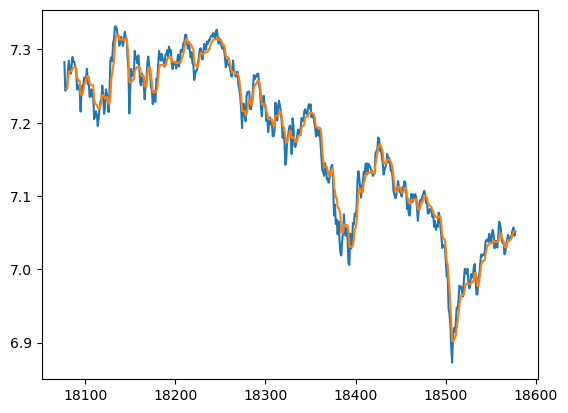

In [39]:
plt.plot(df_temp.iloc[:, 2:4])

KeyError: 'DA'

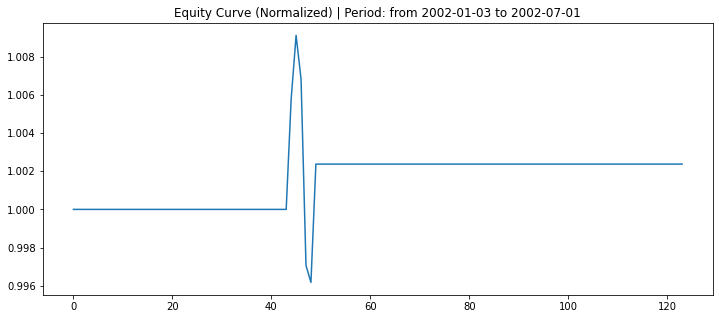

In [51]:
# # ------------------------------------------------------------------------------------------------------------
# plt.figure(figsize = (12,5))
# plt.plot(df_bt['Equity']/df_bt.loc[0, 'Equity'])
# plt.title('Equity Curve (Normalized) | Period: from {} to {}'.format(df_temp.loc[df_temp.index[0], 'Date'], df_temp.loc[df_temp.index[-1], 'Date']))
# print(results['DA'])

# plt.show()